In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Load initial values and covariance matrix
init_values = pd.read_excel("init_values.xlsx", index_col=0)
cov_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)

# Define parameters
mu = np.zeros(cov_matrix.shape[0])
mu[1] = 0.07 * (1/52)  # Weekly drift for log V_US,local
mu[2] = 0.06 * (1/52)  # Weekly drift for log V_EUR
sigma = cov_matrix.values
time_steps = 52  # One year with weekly steps

x0 = init_values.values.flatten()

# Simulate X_t over weekly steps
num_simulations = 10000  # Number of simulation paths
simulations = np.zeros((time_steps + 1, len(x0), num_simulations))
simulations[0, :, :] = x0[:, np.newaxis]



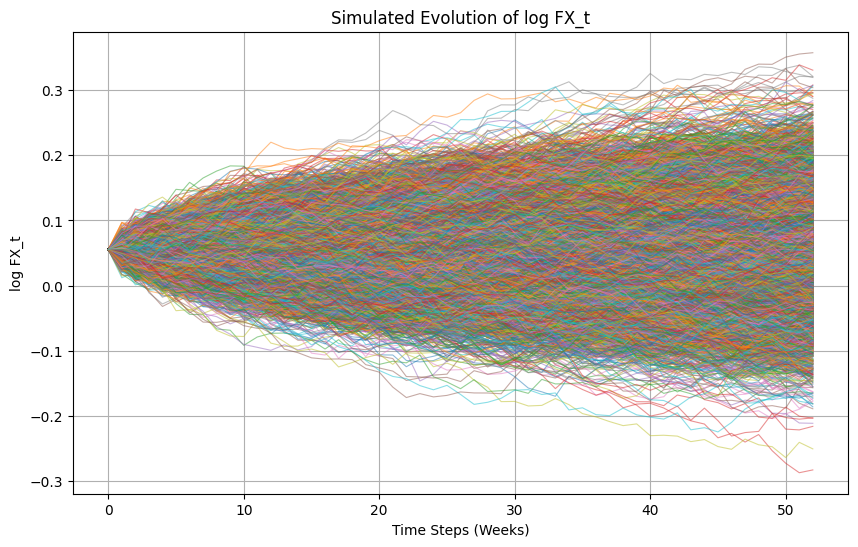

In [9]:
for t in range(1, time_steps + 1):
    delta_x = np.random.multivariate_normal(mu, sigma, size=num_simulations).T
    simulations[t, :, :] = simulations[t - 1, :, :] + delta_x

# Extract log FX_t for visualization
log_fx_t = simulations[:, 0, :]

# Visualization of log FX_t
plt.figure(figsize=(10, 6))
for sim in range(min(num_simulations, 10000)):  # Plot a subset of paths
    plt.plot(log_fx_t[:, sim], alpha=0.5, lw=0.8)
plt.title("Simulated Evolution of log FX_t")
plt.xlabel("Time Steps (Weeks)")
plt.ylabel("log FX_t")
plt.grid(True)
plt.show()


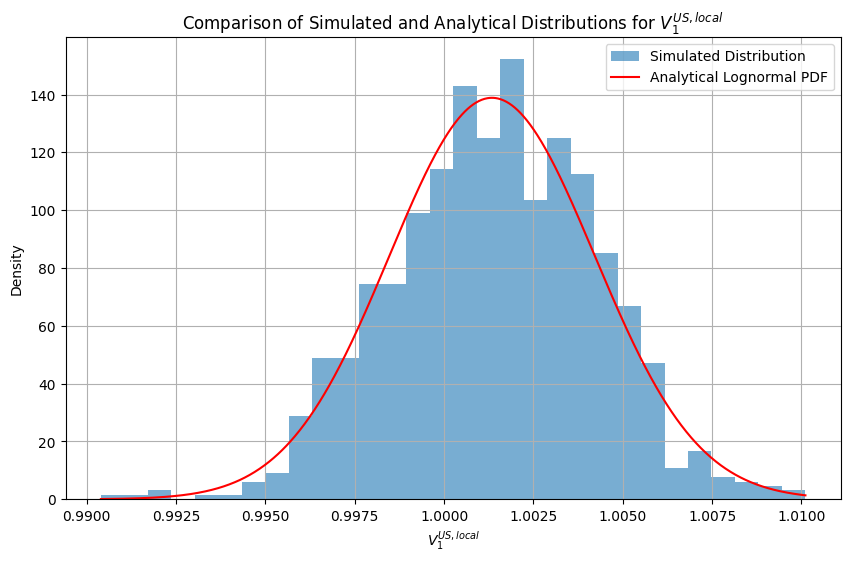

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Load initial values and covariance matrix
init_values = pd.read_excel("init_values.xlsx", index_col=0)
cov_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)

# Extract initial value for EQV US (log-transformed)
log_V0_US_local = init_values.loc["EQV US"].values[0]  # This is 0.0 in the dataset
V0_US_local = np.exp(log_V0_US_local)  # exp(0) = 1.0

# Define parameters for simulation
mu_2 = 0.07  # Annualized drift for log V_US,local
sigma_2 = cov_matrix.loc["EQV US", "EQV US"]  # Variance for EQV US
delta_t = 1 / 52  # Weekly time step (1 year = 52 weeks)

# Simulate the evolution of V_US,local at t = 1
num_simulations = 1000  # Number of Monte Carlo paths
log_V1_US_local = np.random.normal(
    loc=log_V0_US_local + mu_2 * delta_t,  # Mean for log V_US,local
    scale=np.sqrt(sigma_2 * delta_t),      # Std dev for log V_US,local
    size=num_simulations
)
V1_US_local_simulated = np.exp(log_V1_US_local)  # Transform back to original scale

# Analytical lognormal distribution parameters
mu_log = log_V0_US_local + mu_2 * delta_t  # Mean of lognormal
sigma_log = np.sqrt(sigma_2 * delta_t)     # Std dev of lognormal

# Generate analytical lognormal distribution for comparison
x = np.linspace(min(V1_US_local_simulated), max(V1_US_local_simulated), 1000)
pdf_analytical = lognorm.pdf(x, s=sigma_log, scale=np.exp(mu_log))

# Plot the simulated and analytical distributions
plt.figure(figsize=(10, 6))
plt.hist(V1_US_local_simulated, bins=30, density=True, alpha=0.6, label="Simulated Distribution")
plt.plot(x, pdf_analytical, 'r-', label="Analytical Lognormal PDF")
plt.title("Comparison of Simulated and Analytical Distributions for $V_1^{US,local}$")
plt.xlabel("$V_1^{US,local}$")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


In [12]:
print(init_values)


         initial values
fx_spot        0.055293
EQV US         0.000000
EQV EUR        0.000000
1M EUR         0.031221
1Y EUR         0.022467
3Y EUR         0.019712
5Y EUR         0.020047
7Y EUR         0.020564
10Y EUR        0.021388
1M USD         0.045792
1Y USD         0.041673
3Y USD         0.038207
5Y USD         0.037409
7Y USD         0.037250
10Y USD        0.037381


In [17]:
print(cov_matrix.head())

              fx_spot        EQV US       EQV EUR        1M EUR        1Y EUR  \
fx_spot  1.127795e-04  3.842035e-05 -4.709843e-06  1.470387e-07 -2.010531e-07   
EQV US   3.842035e-05  4.280089e-04  3.360156e-04 -9.502569e-08 -2.105753e-06   
EQV EUR -4.709843e-06  3.360156e-04  4.654483e-04 -5.825107e-08 -1.131132e-06   
1M EUR   1.470387e-07 -9.502569e-08 -5.825107e-08  9.576964e-08  5.264444e-08   
1Y EUR  -2.010531e-07 -2.105753e-06 -1.131132e-06  5.264444e-08  3.316056e-07   

               3Y EUR        5Y EUR        7Y EUR       10Y EUR        1M USD  \
fx_spot -3.944625e-07 -3.891030e-07 -4.677894e-07 -5.985775e-07 -3.007970e-07   
EQV US  -3.033449e-06 -3.149032e-06 -3.153021e-06 -2.934691e-06  9.577612e-07   
EQV EUR -1.659849e-06 -1.782065e-06 -1.735210e-06 -1.290746e-06  1.992671e-06   
1M EUR   2.276903e-08  1.447478e-08  1.158173e-08  8.826288e-09  7.351520e-08   
1Y EUR   4.133445e-07  3.856932e-07  3.581944e-07  3.284902e-07  8.684589e-08   

               1Y USD     